# SI618 Lab 9

In this lab, we will be working with three different datasets

1. The UCI data set about wine quality from lab 8. The dataset comes from https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
2. Selected gender inequality related data from global development database downloaded from the World Bank data bank (https://databank.worldbank.org/reports.aspx?source=world-development-indicators#). Read the metadata file for more information about the two variables being used.
3. A monthly time series dataset of the number of domestic airline passengers (in 000s) in the United States collected from https://www.transtats.bts.gov/TRAFFIC/

## Part 1: Wine Quality

### Question 1: (15 points) Load the wine quality dataset. Define a new column **isgood** based on the **quality** column with wines with a quality rating higher than 5 being *good* and the rest being *bad*. 
  * Use a JointGrid approach look at the relationship between sulphates and alcohol.
  * Look at the same relationship separately for *good* and *bad* wines with separate JointGrids
  * What do you observe? 

Hint: When appropriate, create additional figures that allow you to exclude the effect of outliers


In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df_wine = pd.read_csv("winequality-red.csv")
df_wine["isgood"] = df_wine["quality"] > 5
df_wine.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isgood
35,7.8,0.645,0.0,5.5,0.086,5.0,18.0,0.9986,3.40,0.55,9.6,6,True
187,7.7,0.705,0.1,2.6,0.084,9.0,26.0,0.9976,3.39,0.49,9.7,5,False
1429,7.9,0.180,0.4,2.2,0.049,38.0,67.0,0.9960,3.33,0.93,11.3,5,False


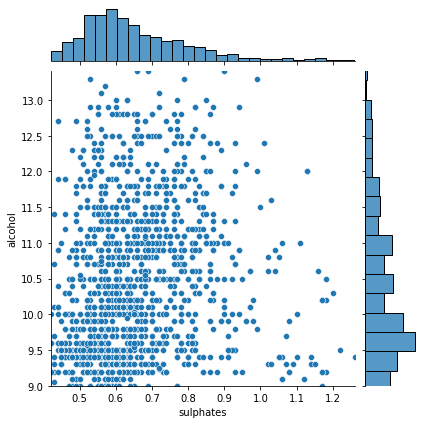

In [3]:
def plot(df):
    l, r = 0.01, 0.99
    xlim = df["sulphates"].quantile(l), df["sulphates"].quantile(r)
    ylim = df["alcohol"].quantile(l), df["alcohol"].quantile(r)
    joint_plot = sns.JointGrid(x="sulphates", y="alcohol", data=df, xlim=xlim, ylim=ylim)
    return joint_plot.plot(sns.scatterplot, sns.histplot)
plot(df_wine)

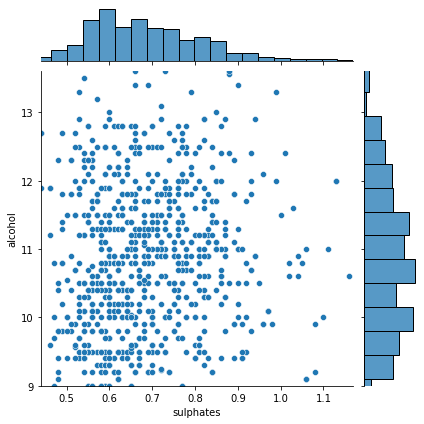

In [4]:
df_good_wine = df_wine[df_wine["isgood"]]
plot(df_good_wine)

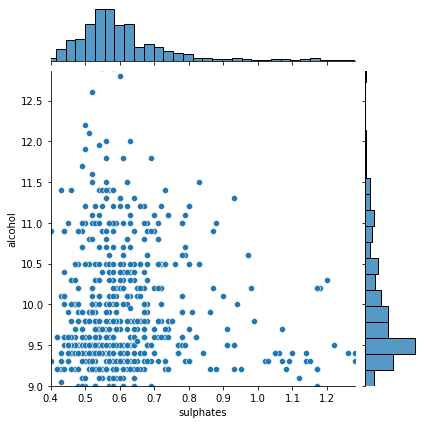

In [5]:
df_bad_wine = df_wine[~df_wine["isgood"]]
plot(df_bad_wine)

Most Bad wines have low alcohol and sulphates, while good wines are distributed more a bit more uniformly in this range.

### Question 2: (15 points) Use OLS to perform either a regression or an ANOVA for the relationship between sulphates with (i) categorical variable of wine quality and (ii) original quality. Interpret your results.

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
ols_good = smf.ols("sulphates ~ C(isgood)", data=df_wine).fit()
ols_good.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sulphates   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     79.74
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.15e-18
Time:                        09:34:35   Log-Likelihood:                 608.57
No. Observations:                1599   AIC:                            -1213.
Df Residuals:                    1597   BIC:                            -1202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6185      0.006    101.955      0.000       0.607       0.630
C(isgood)[T.True]     0.0741      0.008      8.930      0.000       0.058       0.090
==============================================================================
Omnibus:                     1001.323   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14483.316
Skew:                           2.695   Prob(JB):                         0.00
Kurtosis:                      16.723   Cond. No.                         2.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
ols_quality = smf.ols("sulphates ~ quality", data=df_wine).fit()
ols_quality.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sulphates   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     107.7
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.80e-24
Time:                        09:34:35   Log-Likelihood:                 621.82
No. Observations:                1599   AIC:                            -1240.
Df Residuals:                    1597   BIC:                            -1229.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3607      0.029     12.464      0.000       0.304       0.418
quality        0.0528      0.005     10.380      0.000       0.043       0.063
==============================================================================
Omnibus:                     1042.311   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16731.569
Skew:                           2.811   Prob(JB):                         0.00
Kurtosis:                      17.816   Cond. No.                         41.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The relationship between sulphates and the original quality is stronger than that between sulphates and the categorical quality. With a higher intercept and coefficient, it seems that categorical quality will cause more change on the sulphates than the original quality, but the result is not as significant as the categorical quality's.

## Part 2: Trends in Gender Inequality

In [9]:
from plotnine import geom_point, ggplot, aes, ggtitle, geom_line, geom_smooth, facet_grid, theme 

In [10]:
df_gender = pd.read_csv("gender_world_development.csv").set_index(["Unnamed: 0"])
df_gender.index.name = "index"
df_gender.sample(3)

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
index,,,,,,,,,,,,,,,,,,,,,
182,Bahrain,BHR,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,10.0,7.5,7.5,7.5,7.5,15.0,15.0,15.0
1486,Liechtenstein,LIE,Women Business and the Law Index Score (scale ...,SG.LAW.INDX,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,Eritrea,ERI,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,NaN


### Question 3: (15 points) Visualize the relationship between the representation of women in the parliment (**SG.GEN.PARL.ZS**) and the legal and regulatory support for providing economic opportunities for women (**SG.LAW.INDX**) in the year 2020 using a scatter plot drawn with plotnine (*geom_point*). Then overlay a linear regression fit with the standard error confidence intervals on the same plot (*geom smooth*). Remember to label and resize the figure as necessary to make it readable. What do you observe?   

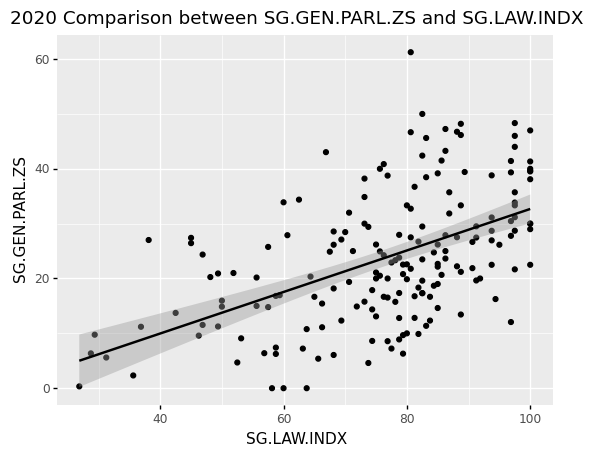

<ggplot: (8736266648567)>

In [11]:
df = df_gender.pivot(columns=["Series Code"], values="2020 [YR2020]", index="Country Code").dropna()
p = ggplot(aes(y="SG.GEN.PARL.ZS", x="SG.LAW.INDX"), data=df)
p + geom_point() + geom_smooth(method="lm", show_legend=True) + ggtitle("2020 Comparison between SG.GEN.PARL.ZS and SG.LAW.INDX")

### Question 4: (10 points) Visualize the evolution of the proportion of women in the legislature in the United States over the years using a line plot

Hint: You can use the pandas *melt* function to convert columns to rows

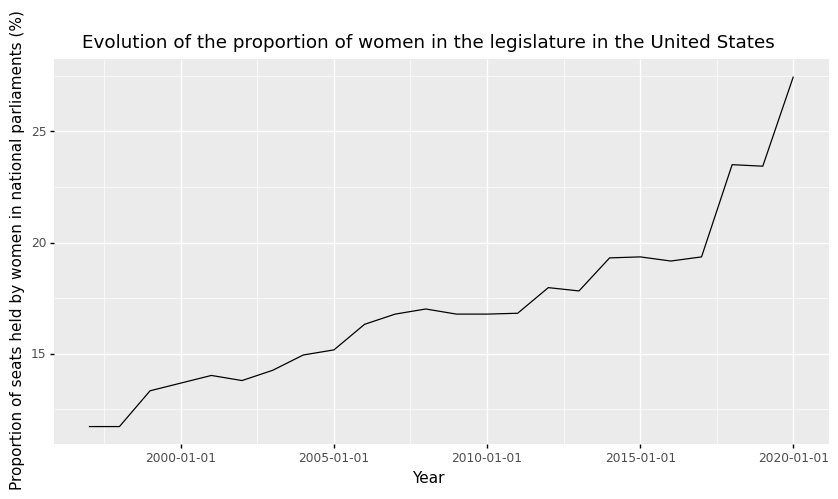

<ggplot: (8736251756993)>

In [18]:
column = "Proportion of seats held by women in national parliaments (%)"
df = df_gender[df_gender["Country Code"]=="USA"].T
df.columns = df.loc["Series Name"]
df.index.name = "Year"
df = df[[column]].reset_index().dropna().iloc[4:]
df["Year"] = pd.to_datetime(df["Year"].str.replace(' \[.+\]','',regex=True))
df[column] = df[column].astype(float)
plot = ggplot(aes(y=column, x="Year"), data=df)
plot + geom_line(aes(group=1)) + ggtitle("Evolution of the proportion of women in the legislature in the United States") + theme(figure_size=(10,5))

### Question 5: (20 points) Create the visualization from Q4 for the 10 most populus countries in the world (China, India, US, Indonesia, Pakistan, Brazil, Nigeria, Bangladesh, Russia, Mexico) using a facet grid from plotnine. Remember to format the figure for reability. What are your observations?

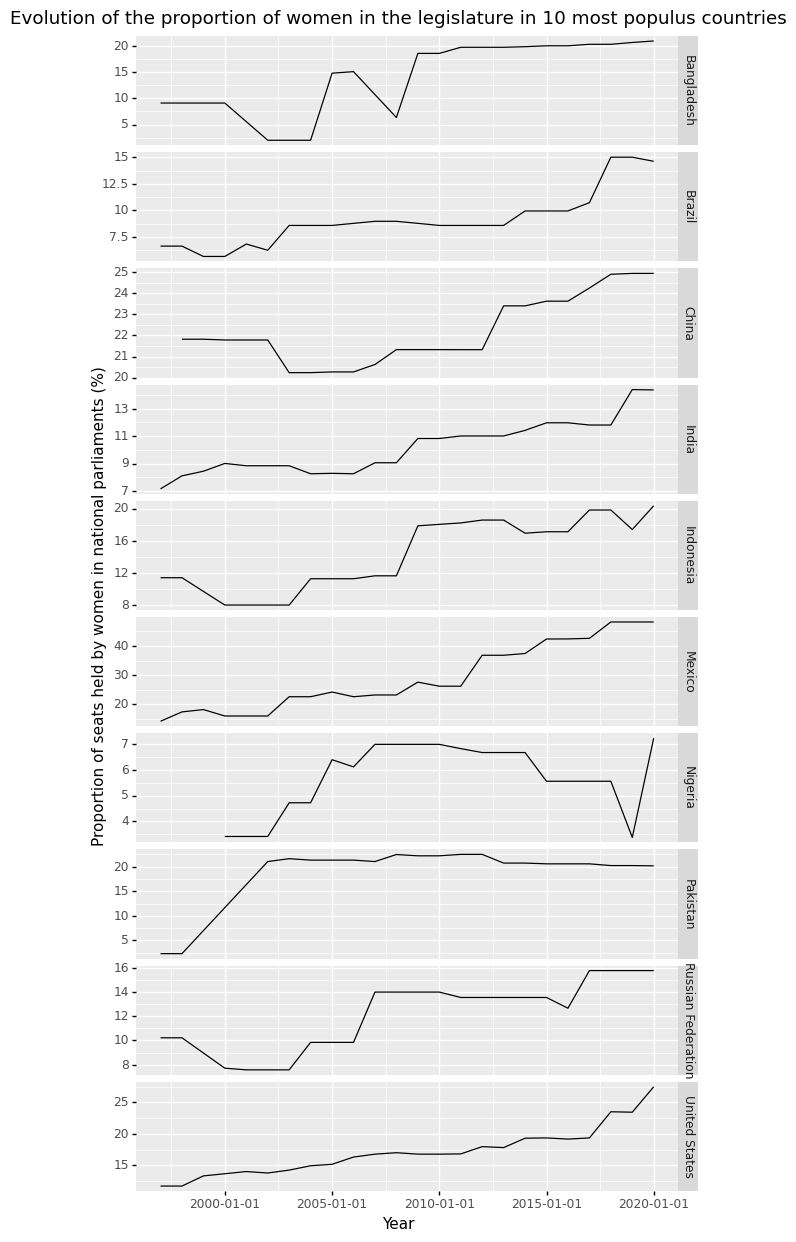

<ggplot: (8736265715688)>

In [13]:
column = "Proportion of seats held by women in national parliaments (%)"
countries = ["China", "India", "United States", "Indonesia", "Pakistan", "Brazil", "Nigeria", "Bangladesh", "Russian Federation", "Mexico"]
# countries = ["China", "India", "United States"]
df = df_gender[df_gender["Country Name"].isin(countries)]
df = df[df["Series Code"]=="SG.GEN.PARL.ZS"].T
df.columns=df.loc["Country Name"] 
df = df.iloc[4:]
df = df.reset_index().melt(
    id_vars=["Year"], 
    value_vars=countries, 
    value_name=column
).dropna()
df["Year"] = pd.to_datetime(df["Year"].str.replace(' \[.+\]','',regex=True))
df[column] = df[column].astype(float)
plot = ggplot(aes(y=column, x="Year"), data=df)
plot + geom_line(aes(group=1)) + ggtitle("Evolution of the proportion of women in the legislature in 10 most populus countries") + facet_grid("Country Name ~ .", scales="free_y") + theme(figure_size=(7, 15))

In 10 most populous countries, the proportion of women in the legislature is higher in 2020 than 2000, but different countries have different rising trend. Bangladesh, Chinda and Nigeria all have an obvious decrease during the period.

## Part 3: Domestic Air Travel in the United States

### Question 6: (10 points) Load the airline passenger dataset. Using plotnine, visualize the monthly time series of the number of domestic passengers with overlayed point and line plots. Format and label the plot to be readable.

Hint: You can use the mizani package to generate the axis breaks and formatted labels

In [14]:
df_airline = pd.read_csv("us_domestic_airline_passengers.csv")
df_airline["Period"] = pd.to_datetime(df_airline["Period"])
df_airline["Year"] = pd.DatetimeIndex(df_airline["Period"]).year
df_airline["Month"] = pd.DatetimeIndex(df_airline["Period"]).month
df_airline.head()

,Period,Passengers,Year,Month
0,2002-01-01,38499,2002,1
1,2002-02-01,38561,2002,2
2,2002-03-01,48397,2002,3
3,2002-04-01,45358,2002,4
4,2002-05-01,47050,2002,5


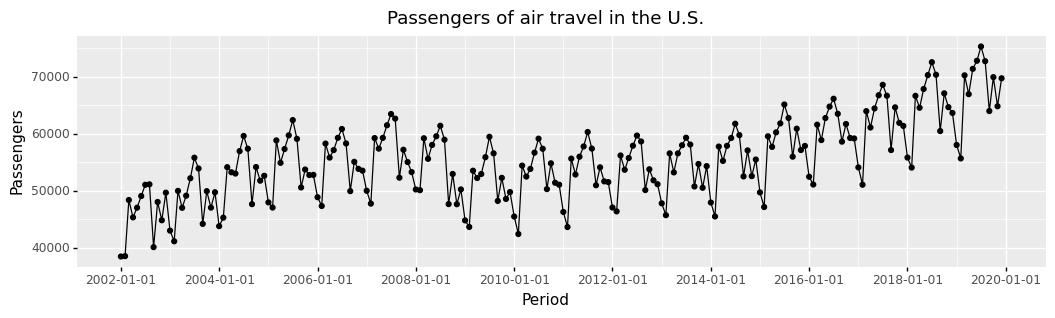

<ggplot: (8736266647095)>

In [15]:
plot = ggplot(df_airline, aes(x="Period", y="Passengers"))
plot + geom_line(aes(group=1)) + theme(figure_size=(12.5,3)) + geom_point() + ggtitle("Passengers of air travel in the U.S.")

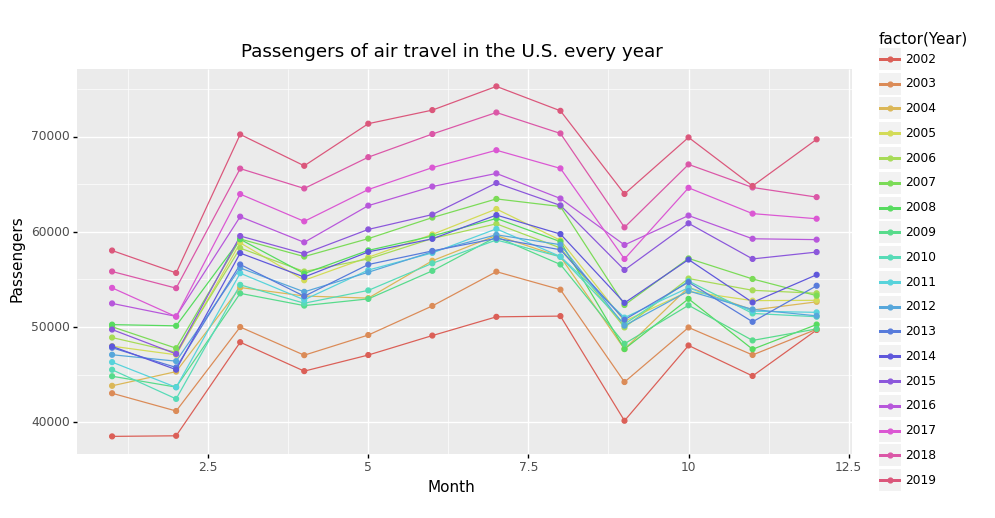

<ggplot: (8736266333013)>

In [16]:
ggplot(df_airline, aes(x="Month", y="Passengers", group = 'Year'))+ \
  ggtitle("Passengers of air travel in the U.S. every year") + \
  geom_line(aes(color = 'factor(Year)')) + geom_point(aes(color = 'factor(Year)')) + theme(figure_size=(10,5))

### Question 7: (15 points) Remove the monthly seasonal effect from the passenger time series and plot the adjusted passenger (mean + residual) time series. What do you observe? 

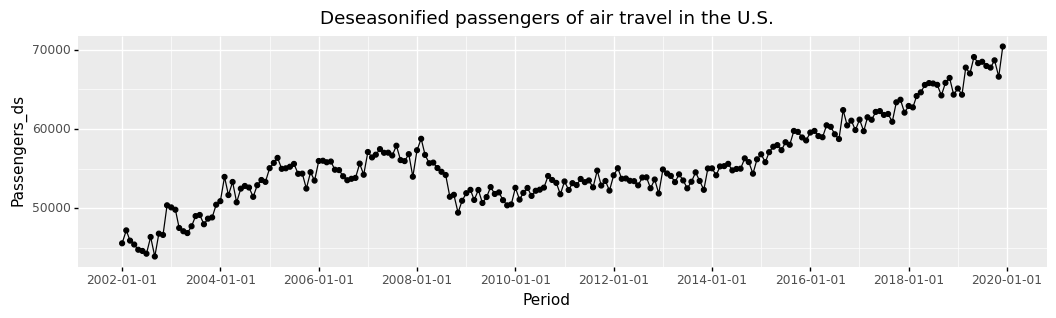

<ggplot: (8736251662580)>

In [17]:
df = df_airline.copy(deep=True)
model = smf.ols("Passengers ~ C(Month)", data=df).fit()
df["Passengers_ds"] = model.resid + df["Passengers"].mean()
plot = ggplot(df, aes(y="Passengers_ds", x="Period"))
plot + geom_line(aes(group=1)) + theme(figure_size=(12.5,3)) + geom_point() + ggtitle("Deseasonified passengers of air travel in the U.S.")

The deseasonified passengers of airtravel in the U.S. keep growing from 2002 to 2020, but it suffers a huge hit in 2008 and 2009, but it's revived again.

## What to submit

* The jupyter notebook file named 'uniquename_si618_lab9_.ipynb'
* The HTML or PDF report generated by your notebook file that should similar to si618_lab9_solution.html